In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_trend_gl.csv", header=24)
df['timestamp'] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
df = df.set_index("timestamp")

df = df.sample(frac=1.)

In [3]:
decomposition = seasonal_decompose(df["smoothed"], period=365)

<AxesSubplot:xlabel='timestamp'>

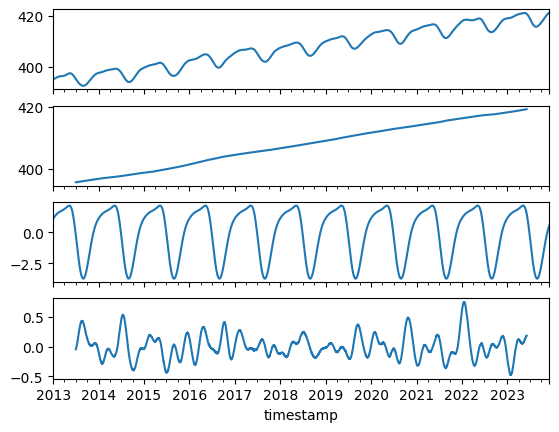

In [4]:
fig, axes = plt.subplots(4, 1, sharex=True)
df.smoothed.plot(ax=axes[0])
decomposition.trend.plot(ax=axes[1])
decomposition.seasonal.plot(ax=axes[2])
decomposition.resid.plot(ax=axes[3])